In [1]:
from google.colab import drive

drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import seaborn as sns
import librosa.display

import os
/content/gdrive/My Drive/archive/respiratory_sound_database

In [6]:
patient_data=pd.read_csv('/content/gdrive/MyDrive/archive/respiratory_sound_database/Respiratory_Sound_Database/patient_diagnosis.csv',names=['pid','disease'])

In [8]:
patient_data.head();

In [10]:
df=pd.read_csv('/content/gdrive/MyDrive/archive/respiratory_sound_database/Respiratory_Sound_Database/audio_and_txt_files/160_1b2_Ar_mc_AKGC417L.txt',sep='\t')
df.head()

,0.109,4.766,0,1
0,4.766,10.342,0,1


In [11]:


import os
path='/content/gdrive/MyDrive/archive/respiratory_sound_database/Respiratory_Sound_Database/audio_and_txt_files/'
files=[s.split('.')[0] for s in os.listdir(path) if '.txt' in s]
files[:5]



['160_1b3_Pl_mc_AKGC417L',
 '160_1b3_Al_mc_AKGC417L',
 '160_1b4_Al_mc_AKGC417L',
 '160_1b4_Ar_mc_AKGC417L',
 '160_1b4_Pr_mc_AKGC417L']

In [12]:
def getFilenameInfo(file):
    return file.split('_')

In [13]:
getFilenameInfo('160_1b3_Al_mc_AKGC417L')

['160', '1b3', 'Al', 'mc', 'AKGC417L']

In [14]:
files_data=[]
for file in files:
    data=pd.read_csv(path + file + '.txt',sep='\t',names=['start','end','crackles','weezels'])
    name_data=getFilenameInfo(file)
    data['pid']=name_data[0]
    data['mode']=name_data[-2]
    data['filename']=file
    files_data.append(data)
files_df=pd.concat(files_data)
files_df.reset_index()
files_df.head()

,start,end,crackles,weezels,pid,mode,filename
0,1.862,5.718,0,1,160,mc,160_1b3_Pl_mc_AKGC417L
1,5.718,9.725,1,1,160,mc,160_1b3_Pl_mc_AKGC417L
2,9.725,13.614,1,1,160,mc,160_1b3_Pl_mc_AKGC417L
3,13.614,17.671,0,1,160,mc,160_1b3_Pl_mc_AKGC417L
4,17.671,19.541,0,0,160,mc,160_1b3_Pl_mc_AKGC417L


In [15]:
patient_data.pid=patient_data.pid.astype('int32')
files_df.pid=files_df.pid.astype('int32')

In [16]:
data=pd.merge(files_df,patient_data,on='pid')
data.head()

,start,end,crackles,weezels,pid,mode,filename,disease
0,1.862,5.718,0,1,160,mc,160_1b3_Pl_mc_AKGC417L,COPD
1,5.718,9.725,1,1,160,mc,160_1b3_Pl_mc_AKGC417L,COPD
2,9.725,13.614,1,1,160,mc,160_1b3_Pl_mc_AKGC417L,COPD
3,13.614,17.671,0,1,160,mc,160_1b3_Pl_mc_AKGC417L,COPD
4,17.671,19.541,0,0,160,mc,160_1b3_Pl_mc_AKGC417L,COPD


In [17]:
os.makedirs('csv_data')
data.to_csv('csv_data/data.csv',index=False)

In [18]:
def getPureSample(raw_data,start,end,sr=22050):
    '''
    Takes a numpy array and spilts its using start and end args
    
    raw_data=numpy array of audio sample
    start=time
    end=time
    sr=sampling_rate
    mode=mono/stereo
    
    '''
    max_ind = len(raw_data) 
    start_ind = min(int(start * sr), max_ind)
    end_ind = min(int(end * sr), max_ind)
    return raw_data[start_ind: end_ind]

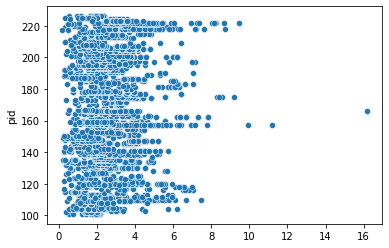

In [19]:
sns.scatterplot(x=(data.end-data.start), y=data.pid)

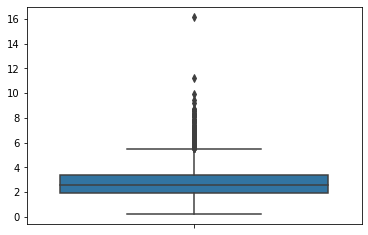

In [20]:
sns.boxplot(y=(data.end-data.start))

In [21]:
os.makedirs('processed_audio_files')

In [22]:
for index,row in data.iterrows():
    print("Index ->",index)
    print("Data->\n",row)
    break

Index -> 0
Data->
 start                        1.862
end                          5.718
crackles                         0
weezels                          1
pid                            160
mode                            mc
filename    160_1b3_Pl_mc_AKGC417L
disease                       COPD
Name: 0, dtype: object


In [24]:
!pip3 install pysoundfile
import librosa as lb
import soundfile as sf
i,c=0,0
for index,row in data.iterrows():
    maxLen=6
    start=row['start']
    end=row['end']
    filename=row['filename']
    
    if end-start>maxLen:
        end=start+maxLen
    
    audio_file_loc=path + filename + '.wav'
    
    if index > 0:
        if data.iloc[index-1]['filename']==filename:
            i+=1
        else:
            i=0
    filename= filename + '_' + str(i) + '.wav'
    
    save_path='processed_audio_files/' + filename
    c+=1
    
    audioArr,sampleRate=lb.load(audio_file_loc)
    pureSample=getPureSample(audioArr,start,end,sampleRate)
    
    reqLen=6*sampleRate
    padded_data = lb.util.pad_center(pureSample, reqLen)
    
    sf.write(file=save_path,data=padded_data,samplerate=sampleRate)
print('Total Files Processed: ',c)

Total Files Processed:  6898


In [25]:
!zip -r /content/audio_files.zip /content/processed_audio_files
from google.colab import files
files.download("/content/audio_files.zip")

Streaming output truncated to the last 5000 lines.
  adding: content/processed_audio_files/130_3p3_Pr_mc_AKGC417L_1.wav (deflated 55%)
  adding: content/processed_audio_files/130_2b2_Pl_mc_AKGC417L_0.wav (deflated 60%)
  adding: content/processed_audio_files/164_1b1_Ll_sc_Meditron_0.wav (deflated 79%)
  adding: content/processed_audio_files/186_3b3_Al_mc_AKGC417L_1.wav (deflated 43%)
  adding: content/processed_audio_files/205_1b3_Al_mc_AKGC417L_5.wav (deflated 83%)
  adding: content/processed_audio_files/130_2b2_Ll_mc_AKGC417L_1.wav (deflated 65%)
  adding: content/processed_audio_files/112_1b1_Ar_sc_Meditron_13.wav (deflated 54%)
  adding: content/processed_audio_files/221_2b2_Pl_mc_LittC2SE_4.wav (deflated 21%)
  adding: content/processed_audio_files/151_2p4_Pl_mc_AKGC417L_2.wav (deflated 43%)
  adding: content/processed_audio_files/130_3b4_Al_mc_AKGC417L_1.wav (deflated 51%)
  adding: content/processed_audio_files/162_2b4_Pl_mc_AKGC417L_2.wav (deflated 21%)
  adding: content/proces

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>